In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Campaign_Data.csv')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Relationship_Status,Frequency,Monetary,Clusters,Age,DealsAccpt,Total_Kids
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,3,11,1,Not in Relationship,22,1617,3,64,1,0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,3,11,0,Not in Relationship,4,27,0,67,1,2
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,3,11,0,in Relationship,20,776,2,56,1,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,3,11,0,in Relationship,6,53,0,37,1,1
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,3,11,0,in Relationship,14,422,1,40,1,1


In this step, we're `loading our dataset and importing essential libraries`.


We use pandas for data manipulation and matplotlib for data visualization.

###***Data Aggregration***

In [ ]:
# Create a new column for total spend by summing all product expenditure columns
data['Total_Spend'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                       data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])



In [ ]:
# Calculate total purchases per customer
data['Total_Purchases'] = (data['NumWebPurchases'] + data['NumCatalogPurchases'] +
                           data['NumStorePurchases'])

In [ ]:
# Display a sample of the modified dataset
data[['ID', 'Total_Spend', 'Total_Purchases']].head()

,ID,Total_Spend,Total_Purchases
0,5524,1617,22
1,2174,27,4
2,4141,776,20
3,6182,53,6
4,5324,422,14


The purpose of this code is to preview and check the content of the modified dataset, specifically focusing on the ID, Total_Spend, and Total_Purchases columns. This is useful for understanding how the data is organized and ensuring that the calculations or data extractions were done correctly.

We create new columns for **Total_Spend and Total_Purchases** to aggregate the monetary value and purchase frequency for each customer. This data will be crucial for calculating metrics like Average Order Value (AOV) and Purchase Frequency.

###***Calculate Key Metrics for CLV***

In [ ]:
# Compute revenue per customer
revenue_per_customer = data.groupby('ID')['Total_Spend'].sum().mean()

# Compute average purchases per customer
purchases_per_customer = data['Total_Purchases'].mean()

# Calculate Average Order Value (AOV)
AOV = revenue_per_customer / purchases_per_customer
print("Average Order Value (AOV):", AOV)

# Calculate the total number of unique customers
total_customers = data['ID'].nunique()

# Calculate Purchase Frequency
frequency = purchases_per_customer / total_customers
print("Purchase Frequency:", frequency)

Average Order Value (AOV): 48.33763146520674
Purchase Frequency: 0.0056742934315209825


1.  To get the average revenue generated per customer.
2. To determine how frequently, on average, customers make purchases.
3. AOV gives insights into how much revenue is generated on average per purchase. This metric is essential for calculating Customer Lifetime Value (CLV).
4. Unique: To know how many distinct customers are in the data, which is important for understanding customer behavior.
5. Purchase frequency helps understand how often a customer makes a purchase over a given period, which is crucial for determining the likelihood of repeat business.

Interpretation of the results:

*   Average Order Value (AOV): Indicates the average amount of revenue generated per purchase. A higher AOV suggests that each transaction is more valuable.
*  Purchase Frequency: Provides insight into how often customers are buying products or services. A higher frequency indicates more regular purchases.


These metrics are fundamental components in calculating **Customer Lifetime Value (CLV), as they help predict future revenue generated from each customer.**

In [ ]:
# Assuming a retention rate of 75%(Industry Standards)
retention_rate = 0.75
churn_rate = 1 - retention_rate
print("Churn Rate:", churn_rate)

# Calculate Expected Customer Lifespan
expected_customer_lifespan = 1 / churn_rate
print("Expected Customer Lifespan:", expected_customer_lifespan)

Churn Rate: 0.25
Expected Customer Lifespan: 4.0


We **assume** a retention rate of 75% and calculate the churn rate.

The expected customer lifespan is the reciprocal of the churn rate, giving us the average duration a customer stays active.

***Calculate Customer Lifetime Value***

In [ ]:
# Calculate Customer Lifetime Value (CLV)
CLV = AOV * frequency * expected_customer_lifespan
print("Customer Lifetime Value (CLV):", CLV)

Customer Lifetime Value (CLV): 1.0971276188732182


We computed CLV using AOV, Purchase Frequency, and Expected Customer Lifespan. This metric gives us the expected revenue from a customer over their lifetime.

The CLV value (in this case, approximately 1.10) represents the average revenue a company can expect to earn from a single customer over the entire relationship with that customer.


*If* the CLV is relatively low, it indicates that either the spending per purchase is low, customers are not making frequent purchases, or the expected lifespan of customers is limited.


*Conversely*, a higher CLV would imply that customers are highly valuable, either due to frequent transactions, high spending amounts, or long-term engagement with the company.

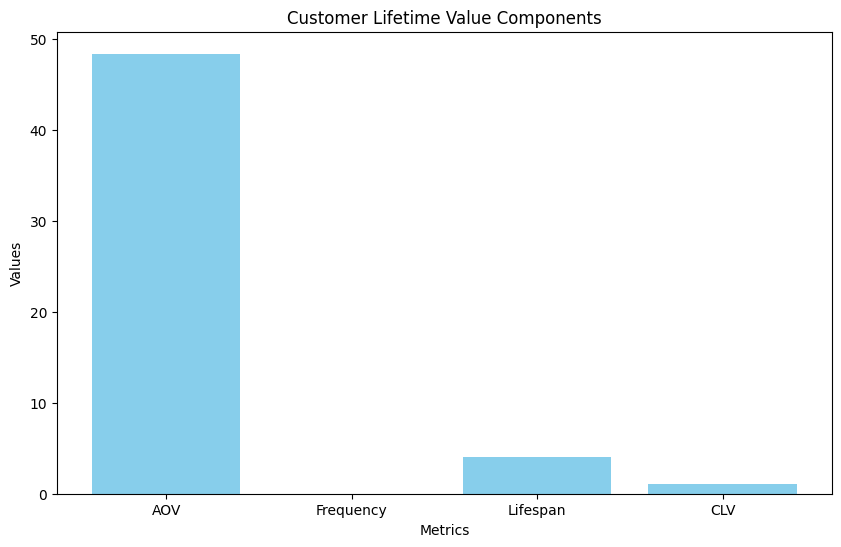

In [ ]:
# Visualize components of CLV
labels = ['AOV', 'Frequency', 'Lifespan', 'CLV']
values = [AOV, frequency, expected_customer_lifespan, CLV]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('Customer Lifetime Value Components')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

**Explanation of Each Component:**
1. AOV (Average Order Value):

The tallest bar indicates that the AOV is the most significant component in your CLV calculation. This means that customers tend to spend a relatively high amount on each purchase, and it heavily influences the overall value.

2. Frequency:

This bar represents how often customers make purchases. The graph shows that the purchase frequency is relatively lower compared to the AOV, suggesting that customers are not buying as frequently as they could.

3. Lifespan:

The lifespan bar illustrates the expected duration (in years or another unit) over which a customer is active with the company. It is moderate compared to AOV, indicating that the customer relationship lifespan contributes to CLV but not as significantly as the order value.

4. CLV (Customer Lifetime Value):

The smallest bar is the CLV, which is derived from multiplying AOV, frequency, and expected lifespan. The relatively small CLV indicates that while individual purchases are high in value, infrequent purchases or a shorter lifespan limit the total value generated by a customer.

**Insights:**
1. Focus on Frequency: Since AOV is already high, efforts to increase the frequency of purchases (e.g., through loyalty programs or targeted marketing) could significantly boost CLV.
2. Retention Strategies: Improving customer retention (and thus the lifespan) could also elevate the CLV. This might involve personalized marketing, better customer support, or engagement strategies.
3. Marketing Investment: The visual disparity between AOV and the other components highlights areas where marketing strategies could be optimized to maximize lifetime value.

###In this analysis, we explore CLV for our customer dataset to gain insights into customer value and inform marketing strategies. This section of the notebook includes:
1. Cohort Based CLV Analysis
2. Segment-Based CLV Analysis
3. Sensitivity Analysis
4. Demographic Visualizations

## 1. Cohort Analysis

Understanding the cohorts with the help of CLV

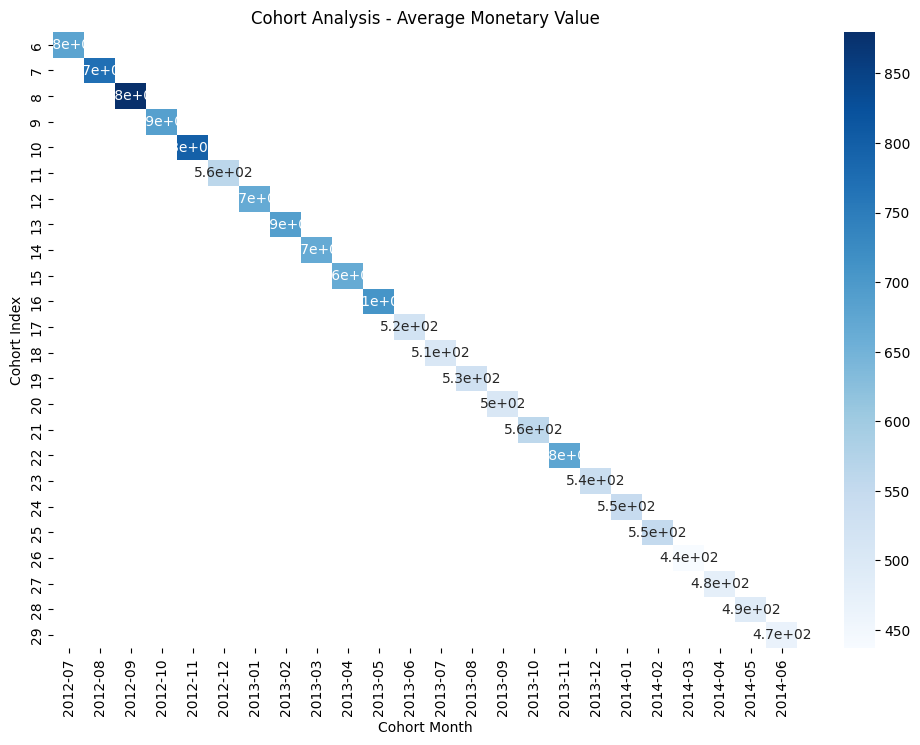

In [ ]:
# Extract Cohort Month
data['CohortMonth'] = data['Dt_Customer'].dt.to_period('M')

# Calculate Cohort Index
data['CohortIndex'] = (data['Dt_Customer'].dt.year - data['Dt_Customer'].dt.year.min()) * 12 + (data['Dt_Customer'].dt.month - data['Dt_Customer'].dt.month.min())

# Cohort Analysis for CLV
cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['Monetary'].mean().unstack(0)

# Visualize Cohort Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_data, annot=True, cmap='Blues')
plt.title('Cohort Analysis - Average Monetary Value')
plt.xlabel('Cohort Month')
plt.ylabel('Cohort Index')
plt.show()

**What the Heatmap Shows:**

**Cohort Grouping:** Each row in the heatmap represents a cohort of customers who made their first purchase in a specific month (the Cohort Month on the x-axis).

**Cohort Index:** The numbers on the y-axis (Cohort Index) represent the number of months since each cohort’s first purchase. For example, an index of 0 is the first month of the cohort, and higher numbers indicate subsequent months.

**Average Monetary Value:** The heatmap cells are colored based on the average monetary value of customers for that cohort at that time. Darker shades indicate higher average spending, while lighter shades indicate lower spending.


*The heatmap shows a gradual decline in average monetary value over time for most cohorts, which is common as customers typically spend more when they are newly acquired and less as time progresses.*

###2. Segmentation Analysis with CLV

<ipython-input-26-0219917fa4de>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = data.groupby('CLV_Segment')['Monetary'].mean()


CLV_Segment
Low            39.329114
Medium        184.695495
High          712.274047
Very High    1492.455696
Name: Monetary, dtype: float64


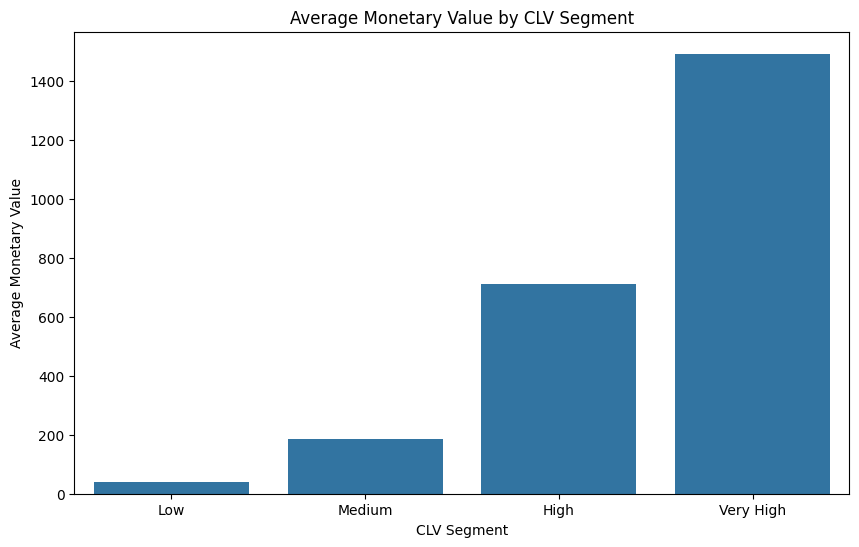

In [ ]:
# Create a new column for CLV segmentation
data['CLV_Segment'] = pd.qcut(data['Monetary'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze CLV across segments
segment_analysis = data.groupby('CLV_Segment')['Monetary'].mean()

print(segment_analysis)

# Visualize CLV Segments
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis.index, y=segment_analysis.values)
plt.title('Average Monetary Value by CLV Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Average Monetary Value')
plt.show()


**CLV Segments:** The x-axis shows the different segments of customers categorized based on their estimated CLV:

*Low:* Customers with the lowest expected lifetime value.

*Medium: *Customers with a moderate expected lifetime value.

*High:* Customers with a high expected lifetime value.

*Very High:* Customers with the highest expected lifetime value.

*Average Monetary Value:* The y-axis represents the average amount of money each segment spends. The higher the bar, the greater the average monetary value for that segment.

**Key Observations**:
Significant Difference: There is a clear and substantial increase in average monetary value as you move from the "Low" segment to the "Very High" segment. Customers in the "Very High" CLV segment spend significantly more compared to those in the "Low" segment.
Strategic Insights: This distribution highlights the importance of targeting and retaining customers in the "High" and "Very High" segments, as they contribute the most revenue. Marketing strategies can be optimized by focusing on these high-value customers.

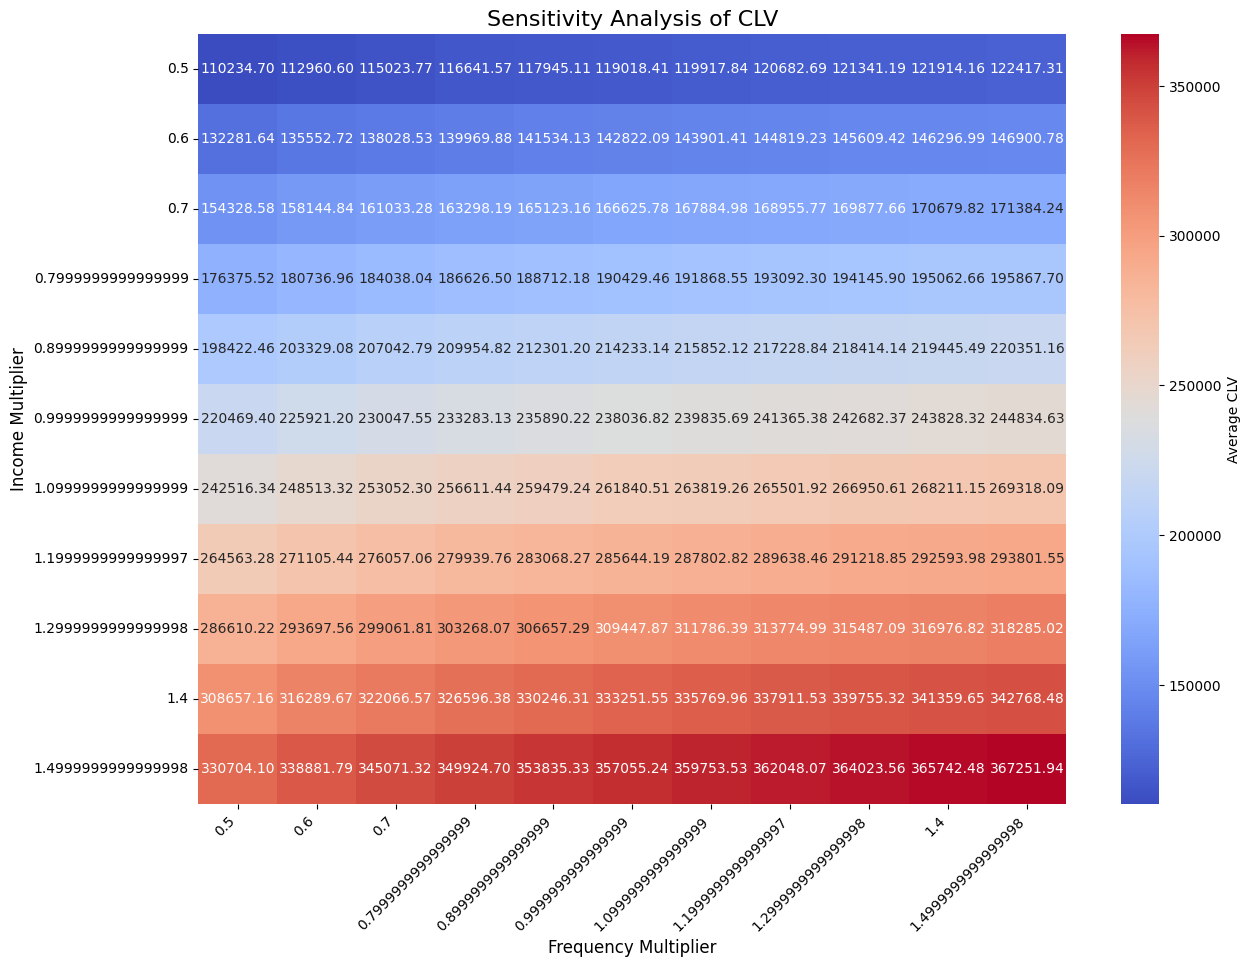

In [ ]:
# Convert results to a DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results, columns=['Income Multiplier', 'Frequency Multiplier', 'Average CLV'])

# Use pivot_table for better formatting
sensitivity_pivot = sensitivity_df.pivot_table(index='Income Multiplier', columns='Frequency Multiplier', values='Average CLV')

# Adjust the plot size and format tick labels
plt.figure(figsize=(14, 10))
sns.heatmap(sensitivity_pivot, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average CLV'})
plt.title('Sensitivity Analysis of CLV', fontsize=16)
plt.xlabel('Frequency Multiplier', fontsize=12)
plt.ylabel('Income Multiplier', fontsize=12)

# Rotate the tick labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


This heatmap represents the results of a sensitivity analysis for Customer Lifetime Value (CLV).

The sensitivity analysis shows how changes in **two factors** — Income Multiplier and Frequency Multiplier — affect the average CLV. Here’s what the heatmap is explaining:

**Interpretation**
Axes Explanation:
X-Axis (Frequency Multiplier): This axis represents the multiplier used to adjust the frequency of customer purchases. Increasing the multiplier means assuming that customers will make purchases more frequently.

Y-Axis (Income Multiplier): This axis represents the multiplier used to adjust the income (or spending) level of customers. Increasing the multiplier means assuming that customers will spend more.

**Color Coding:**

Blue to Red Gradient: The color bar on the right indicates the average CLV values. Blue shades represent lower CLV values, while red shades represent higher CLV values.

As the values increase along both the Income Multiplier and Frequency Multiplier axes, the average CLV becomes higher, shown by the transition from blue to red.

**Analysis Insights:**

Lower Multipliers: When both the Income Multiplier and Frequency Multiplier are at lower levels (e.g., 0.5 or 0.6), the average CLV is relatively low.

Higher Multipliers: As either or both multipliers increase, the average CLV becomes significantly higher. For instance, at the highest multipliers (1.4 or 1.5), the CLV reaches its peak.

Sensitivity: This visualization allowed us to see how sensitive the CLV is to changes in customer behavior.

If the business can increase either the income level or purchase frequency of customers, the **CLV will increase accordingly.**

###**Demographic Visualizations**

**Age Distribution:** A histogram showing the distribution of customer ages.

**Income Distribution:** A histogram showing the distribution of customer income.

**Marital Status:** A bar chart showing the count of customers by marital status.

**Education Level:** A bar chart showing the distribution of customers by education level.

**Income vs. Age:** A scatter plot showing the relationship between age and income, colored by marital status.

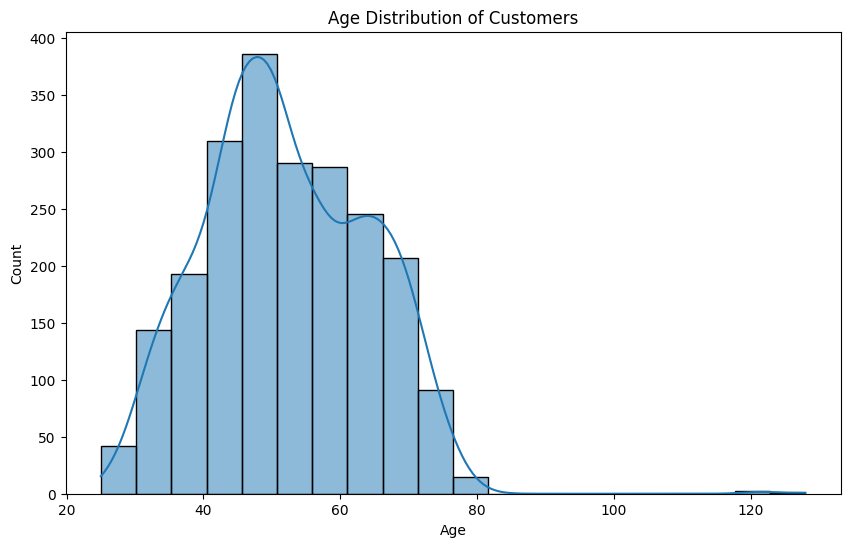

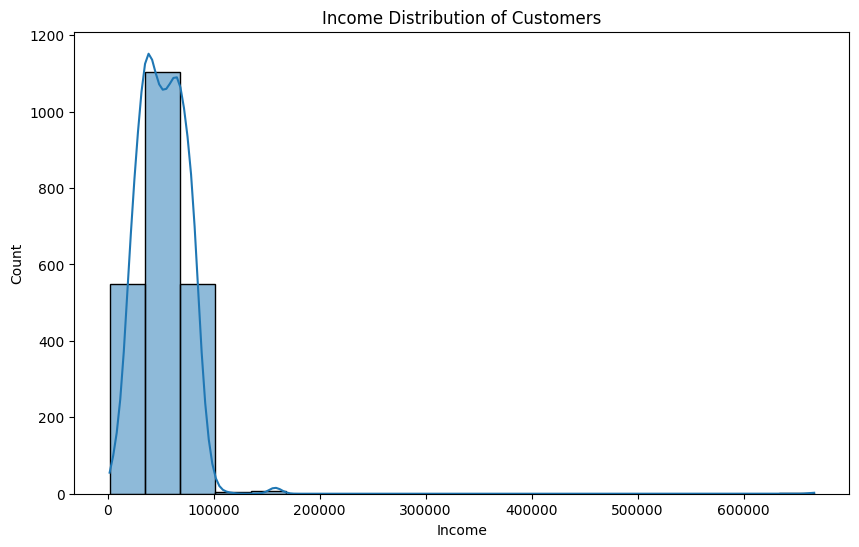

<ipython-input-35-0a462c6b0f27>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=data, palette='Set2')


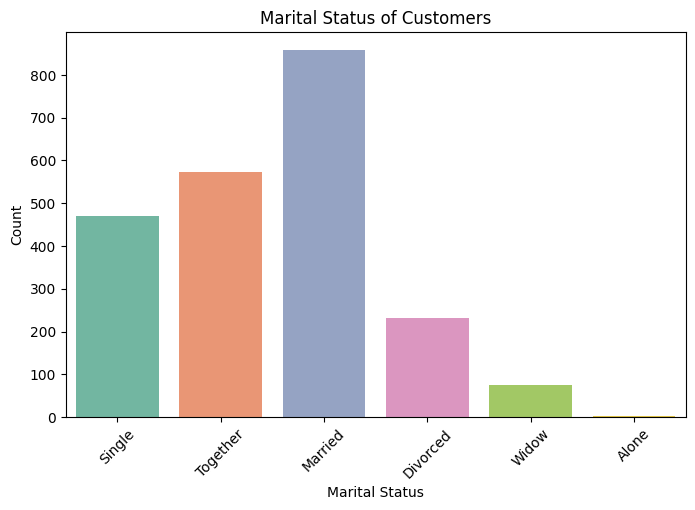

<ipython-input-35-0a462c6b0f27>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='Set3')


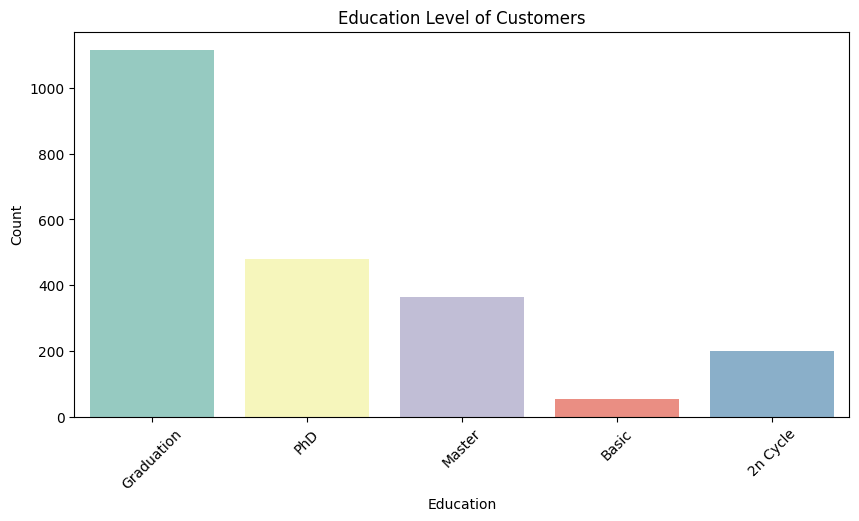

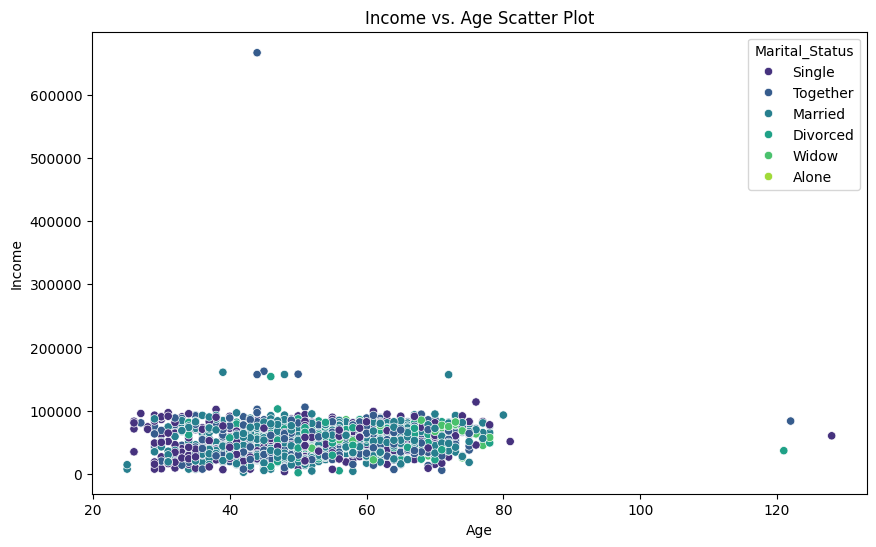

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# 3. Marital Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', data=data, palette='Set2')
plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Education Level Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', data=data, palette='Set3')
plt.title('Education Level of Customers')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Income vs. Age Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=data, hue='Marital_Status', palette='viridis')
plt.title('Income vs. Age Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

1.**Age Distribution of Customers**: The histogram shows the distribution of customer ages. The data is concentrated around ages 40 to 60, with a gradual decline toward older ages. The presence of outliers at extremely high ages could skew the data.

Integration with CLV: Knowing the age distribution helps us understand the target demographics. If older age groups have higher CLV, we may tailor marketing strategies to appeal more to them. Age also helps segment customers for targeted offerings, as different age groups may have varying product preferences and purchasing behaviors.

2. **Income Distribution of Customers:** The income distribution is highly right-skewed, indicating that most customers have income levels below $100,000, with only a few earning significantly more.

Integration with CLV: Income is a critical factor for predicting CLV. Higher-income customers may spend more, leading to higher CLV. Understanding the income distribution allows us to develop income-based customer segments and customize offers to maximize profitability from each segment.
3. **Marital Status of Customers**: The bar chart illustrates that the majority of customers are married, followed by those who are in a relationship ('Together'). There are fewer customers who are divorced, widowed, or single.
Integration with CLV: Marital status may impact spending patterns and brand loyalty. Married customers may have more stable financial situations and higher CLV compared to singles or divorced individuals. Using marital status as a segmentation criterion can help in personalizing marketing messages to increase engagement and spending.
4. **Education Level of Customers**: The bar chart shows that most customers have completed graduation, followed by those with PhDs and master's degrees. Only a few have basic education or are in the second cycle.

Integration with CLV: Education level can be a predictor of income and spending behavior. Higher education often correlates with higher income, which can lead to higher CLV. Tailoring communication strategies based on education can be effective, for example, using more sophisticated language and content for highly educated customers.

